## 6.2 Kategoryzacja za pomocą K-Means w 2D

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, labels = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=3, cluster_std=1.0)

In [5]:
X, labels

(array([[ 8.9017848 ,  7.18404873],
        [-3.69456115,  1.22679381],
        [-3.61020201,  1.5916035 ],
        ...,
        [ 7.76895044,  5.62196276],
        [ 2.12414555,  5.28234711],
        [ 6.07424254,  7.21915661]]),
 array([2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2,
        2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0,
        0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1,
        0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2,
        2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1,
        1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2,
        2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2,
        1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0,
        0, 2, 2, 2, 0, 0, 2, 

In [3]:
import matplotlib.pyplot as plt

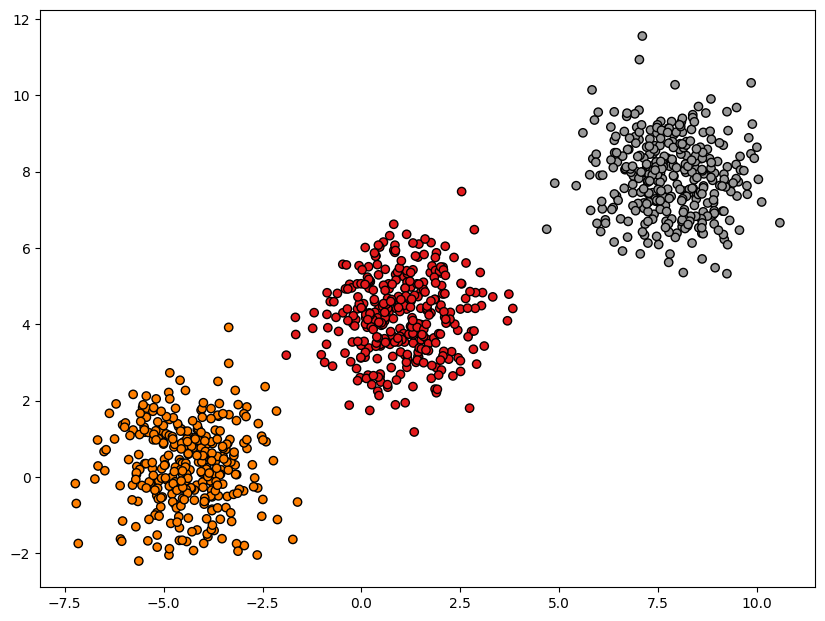

In [13]:
plt.figure(figsize=(10, 7.5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, cmap="Set1", edgecolors=(0, 0, 0, 1))

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3, random_state=2019, init="random", n_init=1, max_iter=1000)
kmeans.fit(X)

KMeans(init='random', max_iter=1000, n_clusters=3, n_init=1, random_state=2019)

In [16]:
import numpy as np

In [17]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [18]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

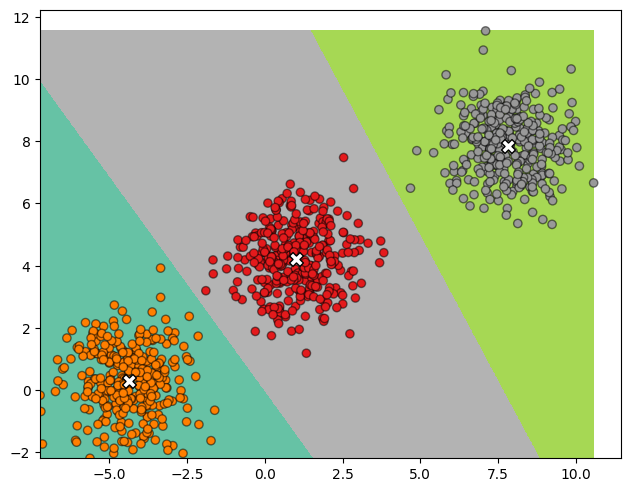

In [19]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7.5, 7.5))
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap="Set2", origin="lower")
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, cmap="Set1", edgecolors=(0, 0, 0, 0.5))
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker="X", c="white", edgecolors=(0, 0, 0, 1), s=100.0)

In [21]:
def visualize_kmeans(kmeans, X, labels):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap="Set2", origin="lower")
    plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, cmap="Set1", edgecolors=(0, 0, 0, 0.5))
    plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker="X", c="white",
                edgecolors=(0, 0, 0, 1), s=100.0)
    

### Wizualizacja iteracji K-Means

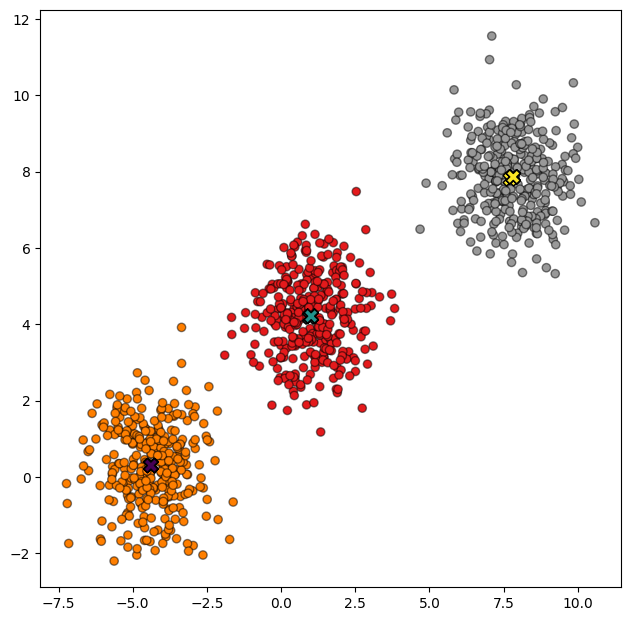

In [23]:
plt.figure(figsize=(7.5, 7.5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, cmap="Set1", edgecolors=(0, 0, 0, 0.5))
for iters in range(1, 11):
    kmeans = KMeans(n_clusters=3, random_state=2019, init="random", max_iter=iters)
    kmeans.fit(X)
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker="X", c=[0, 1, 2], edgecolors=(0,0,0,1), s=100)

Dla powyższego przykładu ręcznie określiliśmy liczbę klastrów na  3. Zrobiliśmy to tylko dlatego, że sami wygenerowaliśmy dane wg schematu, który zakładał trzy podgrupy. Typowo nie będziemy jednak wiedzieć.

In [24]:
kmeans = KMeans(n_clusters=4, random_state=2019, init="random", n_init=1, max_iter=100)

In [25]:
kmeans.fit(X)

KMeans(init='random', max_iter=100, n_clusters=4, n_init=1, random_state=2019)

<Figure size 1050x750 with 0 Axes>

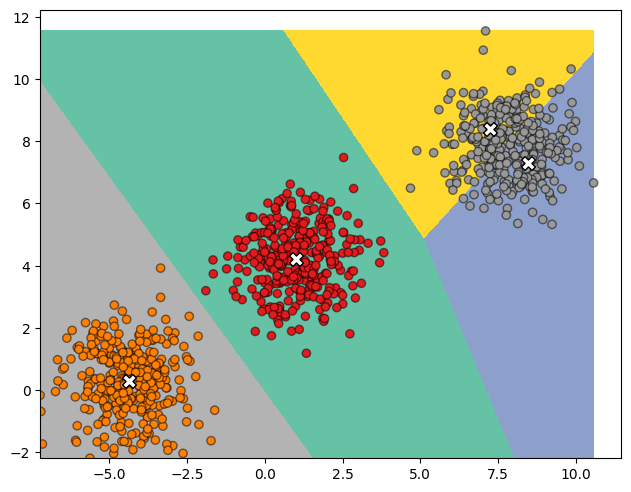

In [29]:
plt.figure(figsize=(10.5, 7.5))
visualize_kmeans(kmeans, X, labels)

### Problemy nierozwiązywalne przez K-Means
K-Means sprawdza się dobrze gdy chodzi o pewne klasy problemów, które są liniowo separowalne. Dzieje się tak dlatego, iż pod spodem korzystamy z metryki euklidesowej. Wygenerujmy jednak inny zestaw danych, który dla człowieka jest intuicyjnie prosty do rozwiązania.

In [31]:
from sklearn.datasets import make_circles

In [32]:
X_circle, labels_circle = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=326321)

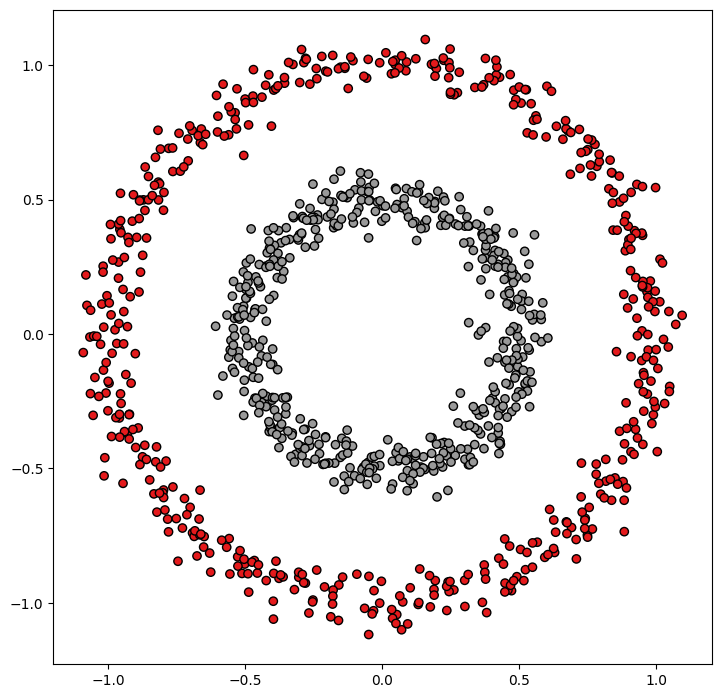

In [35]:
plt.figure(figsize=(8.5, 8.5))
plt.scatter(x=X_circle[:, 0], y=X_circle[:, 1], c=labels_circle, cmap="Set1", edgecolors=(0,0,0,1))

In [36]:
kmeans = KMeans(n_clusters=2, random_state=1, init="random", n_init=1, max_iter=1)
kmeans.fit(X_circle)

KMeans(init='random', max_iter=1, n_clusters=2, n_init=1, random_state=1)

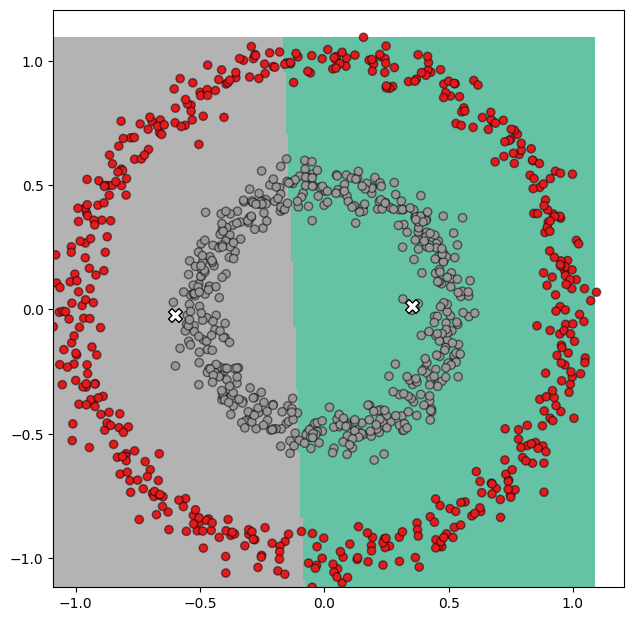

In [37]:
visualize_kmeans(kmeans, X_circle, labels_circle)

In [38]:
kmeans = KMeans(n_clusters=2, random_state=1, init="random", n_init=1, max_iter=1000)
kmeans.fit(X_circle)

KMeans(init='random', max_iter=1000, n_clusters=2, n_init=1, random_state=1)

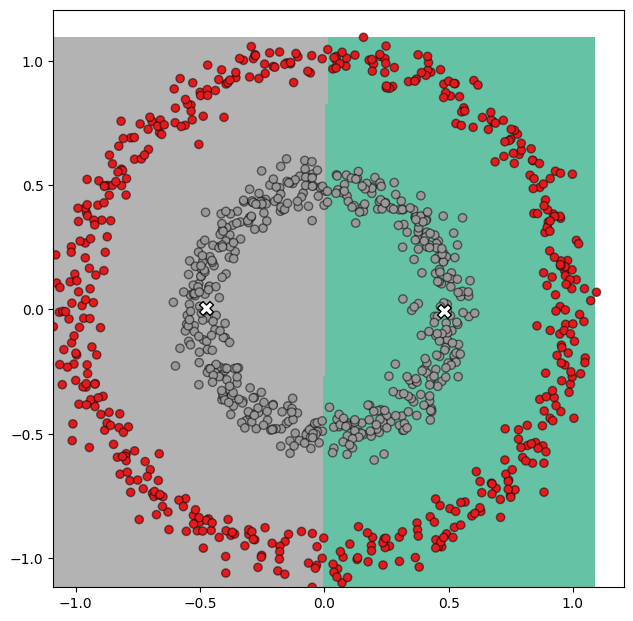

In [39]:
visualize_kmeans(kmeans, X_circle, labels_circle)